In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt


In [3]:
from Boosting import runBoosting

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

# Vanilla Wong Neural Net CIFAR10

In [6]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=300, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Non Adv

In [6]:
cifar10_vanilla = WongNeuralNetCIFAR10()
cifar10_vanilla.fit(train_loader, test_loader, alpha = 0, epochs = 100, adv=False, epsilon=0)

NameError: name 'train_loader' is not defined

In [ ]:
cifar10_vanilla.plot_train(batchSize = 100)

In [ ]:
cifar10_vanilla.plot_val_accuracies(batchSize = 100)

In [ ]:
print(cifar10_vanilla)

## Adversarial

In [7]:
from AdversarialAttacks import attack_fgsm

In [8]:
maxSamples = int(2e5)

In [9]:
cifar10_adv = WongNeuralNetCIFAR10(attack_eps=[0.01, 0.02, 0.05, 0.1])
cifar10_adv.fit(train_loader, test_loader, adv_train=True, val_attacks=[attack_fgsm], maxSample=maxSamples)

adv_train: True
Epoch 0
about to record accs [<function attack_fgsm at 0x7f15a52e6f28>]
about to attack <function attack_fgsm at 0x7f15a52e6f28>
losses, accs {'val': 2.0935981273651123, <function attack_fgsm at 0x7f15a52e6f28>: [2.1246731281280518, 2.1538662910461426, 2.231489658355713, 2.3335676193237305]} {'val': 0.25333333333333335, <function attack_fgsm at 0x7f15a52e6f28>: [0.22, 0.19, 0.11, 0.03333333333333333]}
Val accuracy: 0.25333333333333335
Progress: 10000,  val accuracy: 0.2533
about to record accs [<function attack_fgsm at 0x7f15a52e6f28>]
about to attack <function attack_fgsm at 0x7f15a52e6f28>
losses, accs {'val': 1.9943435192108154, <function attack_fgsm at 0x7f15a52e6f28>: [2.011516571044922, 2.028430223464966, 2.0775139331817627, 2.154104709625244]} {'val': 0.27666666666666667, <function attack_fgsm at 0x7f15a52e6f28>: [0.24666666666666667, 0.23333333333333334, 0.2, 0.16333333333333333]}
Val accuracy: 0.27666666666666667
Progress: 20000,  val accuracy: 0.2767
about to 

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


about to record accs [<function attack_fgsm at 0x7f15a52e6f28>]
about to attack <function attack_fgsm at 0x7f15a52e6f28>
losses, accs {'val': 1.6719495058059692, <function attack_fgsm at 0x7f15a52e6f28>: [1.6920186281204224, 1.712327241897583, 1.7744935750961304, 1.8815258741378784]} {'val': 0.4, <function attack_fgsm at 0x7f15a52e6f28>: [0.3933333333333333, 0.37666666666666665, 0.35333333333333333, 0.29]}
Val accuracy: 0.4
Progress: 60000,  val accuracy: 0.4000
about to record accs [<function attack_fgsm at 0x7f15a52e6f28>]
about to attack <function attack_fgsm at 0x7f15a52e6f28>
losses, accs {'val': 1.6354893445968628, <function attack_fgsm at 0x7f15a52e6f28>: [1.6564799547195435, 1.6777496337890625, 1.7431148290634155, 1.8563958406448364]} {'val': 0.43, <function attack_fgsm at 0x7f15a52e6f28>: [0.41, 0.39666666666666667, 0.36666666666666664, 0.29333333333333333]}
Val accuracy: 0.43
Progress: 70000,  val accuracy: 0.4300
about to record accs [<function attack_fgsm at 0x7f15a52e6f28>

In [10]:
cifar10_adv.accuracies

{'train': [0.22,
  0.22,
  0.33,
  0.38,
  0.44,
  0.36,
  0.32,
  0.48,
  0.52,
  0.44,
  0.45,
  0.45,
  0.43,
  0.41,
  0.52,
  0.51,
  0.49,
  0.48,
  0.5],
 'val': [0.25333333333333335,
  0.27666666666666667,
  0.36,
  0.3333333333333333,
  0.41333333333333333,
  0.4,
  0.43,
  0.44,
  0.4666666666666667,
  0.44,
  0.4533333333333333,
  0.4666666666666667,
  0.4866666666666667,
  0.4766666666666667,
  0.51,
  0.52,
  0.52,
  0.53,
  0.5233333333333333],
 'attack_fgsm': [[0.22,
   0.24666666666666667,
   0.3466666666666667,
   0.3233333333333333,
   0.3933333333333333,
   0.3933333333333333,
   0.41,
   0.43333333333333335,
   0.45,
   0.41,
   0.43333333333333335,
   0.45,
   0.4766666666666667,
   0.4666666666666667,
   0.4866666666666667,
   0.5166666666666667,
   0.5,
   0.5166666666666667,
   0.5133333333333333],
  [0.19,
   0.23333333333333334,
   0.33666666666666667,
   0.32,
   0.38333333333333336,
   0.37666666666666665,
   0.39666666666666667,
   0.4266666666666667,
   0.

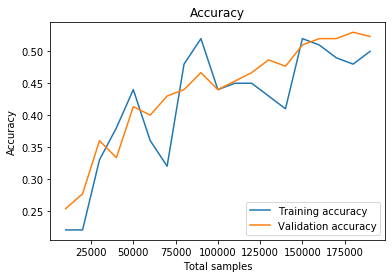

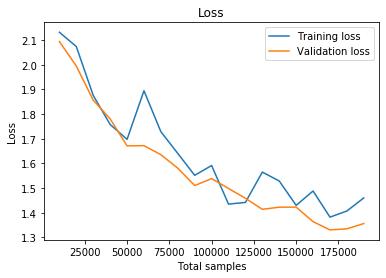

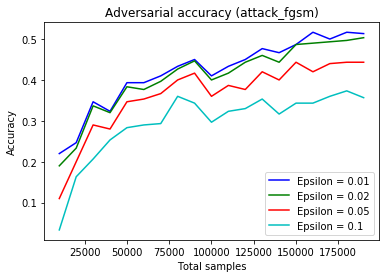

In [11]:
path_head = 'results/plots/cifar10_wl/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_adv.plot_accuracies(acc_file)
cifar10_adv.plot_loss(loss_file)
cifar10_adv.plot_adversarial_accuracies(adv_acc_file)

In [12]:
print(cifar10_adv.train_checkpoints)

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000]
